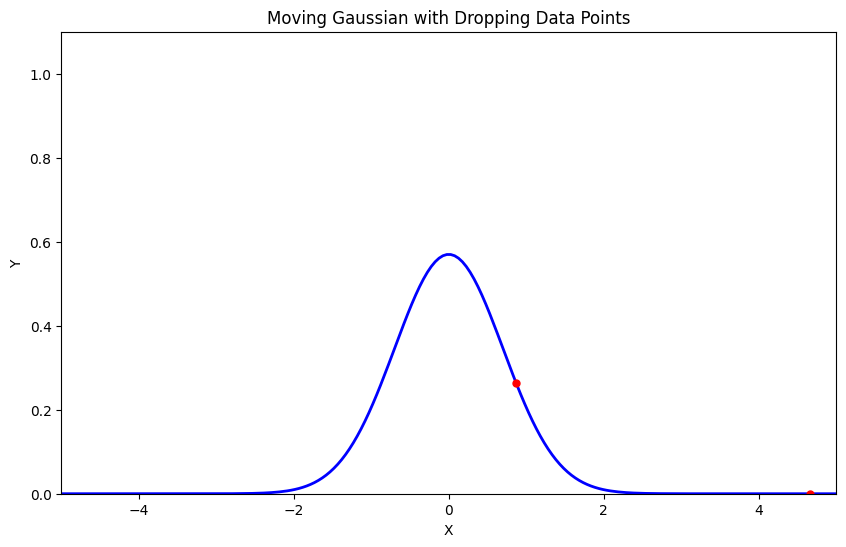

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim(-5, 5)
ax.set_ylim(0, 1.1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Moving Gaussian with Dropping Data Points')

# Initialize the Gaussian plot and data points
line, = ax.plot([], [], 'b-', lw=2)
points, = ax.plot([], [], 'ro', ms=5)

# Generate x values
x = np.linspace(-5, 5, 200)

# Initialize data storage
data_x = []
data_y = []

# Gaussian function
def gaussian(x, mu, sigma):
    return np.exp(-((x - mu) ** 2) / (2 * sigma ** 2)) / (sigma * np.sqrt(2 * np.pi))

# Animation update function
def update(frame):
    # Update Gaussian parameters
    mu = 3 * np.sin(frame / 50)
    sigma = 0.5 + 0.2 * np.cos(frame / 30)
    
    # Calculate new y values
    y = gaussian(x, mu, sigma)
    
    # Update the Gaussian plot
    line.set_data(x, y)
    
    # Add a new data point every 10 frames
    if frame % 10 == 0:
        new_x = np.random.uniform(-5, 5)
        new_y = gaussian(new_x, mu, sigma)
        data_x.append(new_x)
        data_y.append(new_y)
    
    # Update the data points
    points.set_data(data_x, data_y)
    
    return line, points

# Create the animation
anim = FuncAnimation(fig, update, frames=500, interval=50, blit=True)

plt.show()


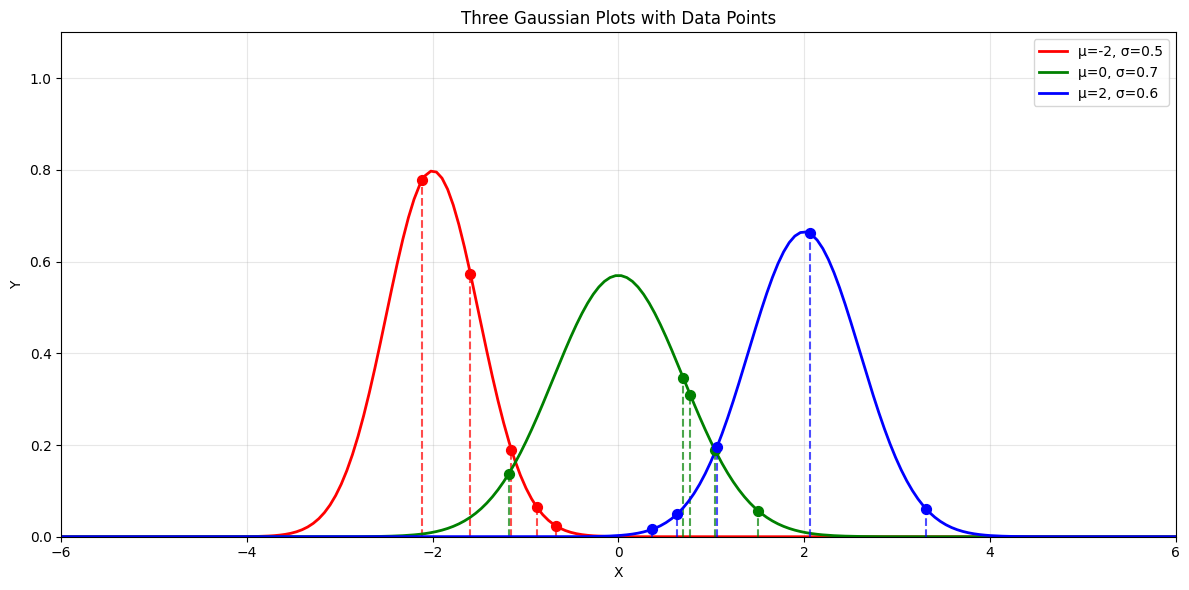

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_xlim(-6, 6)
ax.set_ylim(0, 1.1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Three Gaussian Plots with Data Points')

# Generate x values
x = np.linspace(-6, 6, 200)

# Gaussian function
def gaussian(x, mu, sigma):
    return np.exp(-((x - mu) ** 2) / (2 * sigma ** 2)) / (sigma * np.sqrt(2 * np.pi))

# Define parameters for three Gaussians
params = [
    {'mu': -2, 'sigma': 0.5, 'color': 'red'},
    {'mu': 0, 'sigma': 0.7, 'color': 'green'},
    {'mu': 2, 'sigma': 0.6, 'color': 'blue'}
]

# Plot Gaussians and data points
for param in params:
    mu, sigma, color = param['mu'], param['sigma'], param['color']
    
    # Calculate y values
    y = gaussian(x, mu, sigma)
    
    # Plot Gaussian
    ax.plot(x, y, color=color, lw=2, label=f'μ={mu}, σ={sigma}')
    
    # Generate random data points
    data_x = np.random.uniform(mu-2, mu+2, 5)
    data_y = gaussian(data_x, mu, sigma)
    
    # Plot data points and vertical lines
    ax.scatter(data_x, data_y, color=color, s=50, zorder=3)
    for dx, dy in zip(data_x, data_y):
        ax.plot([dx, dx], [0, dy], color=color, linestyle='--', alpha=0.7)

# Add legend
ax.legend()

# Show plot
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
